# Exploration of the Power Usage dataset from 2016 to 2020 Houston TX.

### Import libraries, dataset, and perform basic data review and adjustment

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose


In [6]:
df = pd.read_csv('power_usage_2016_to_2020.csv')

In [7]:
df.head()

,StartDate,Value (kWh),day_of_week,notes
0,2016-01-06 00:00:00,1.057,2,weekday
1,2016-01-06 01:00:00,1.171,2,weekday
2,2016-01-06 02:00:00,0.560,2,weekday
3,2016-01-06 03:00:00,0.828,2,weekday
4,2016-01-06 04:00:00,0.932,2,weekday


In [8]:
df.describe()

,Value (kWh),day_of_week
count,35952.000000,35952.000000
mean,0.891631,2.997330
std,0.908133,1.999024
min,0.064000,0.000000
25%,0.323750,1.000000
50%,0.501000,3.000000
75%,1.072000,5.000000
max,6.446000,6.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   StartDate    35952 non-null  object 
 1   Value (kWh)  35952 non-null  float64
 2   day_of_week  35952 non-null  int64  
 3   notes        35952 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ MB


In [10]:
df['StartDate'] = pd.to_datetime(df['StartDate'])
df['notes'] = df['notes'].astype(str)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   StartDate    35952 non-null  datetime64[ns]
 1   Value (kWh)  35952 non-null  float64       
 2   day_of_week  35952 non-null  int64         
 3   notes        35952 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.1+ MB


In [12]:
df.head()

,StartDate,Value (kWh),day_of_week,notes
0,2016-01-06 00:00:00,1.057,2,weekday
1,2016-01-06 01:00:00,1.171,2,weekday
2,2016-01-06 02:00:00,0.560,2,weekday
3,2016-01-06 03:00:00,0.828,2,weekday
4,2016-01-06 04:00:00,0.932,2,weekday


In [13]:
df.isna().sum()

StartDate      0
Value (kWh)    0
day_of_week    0
notes          0
dtype: int64

In [14]:
df.head()

,StartDate,Value (kWh),day_of_week,notes
0,2016-01-06 00:00:00,1.057,2,weekday
1,2016-01-06 01:00:00,1.171,2,weekday
2,2016-01-06 02:00:00,0.560,2,weekday
3,2016-01-06 03:00:00,0.828,2,weekday
4,2016-01-06 04:00:00,0.932,2,weekday


<Axes: xlabel='StartDate'>

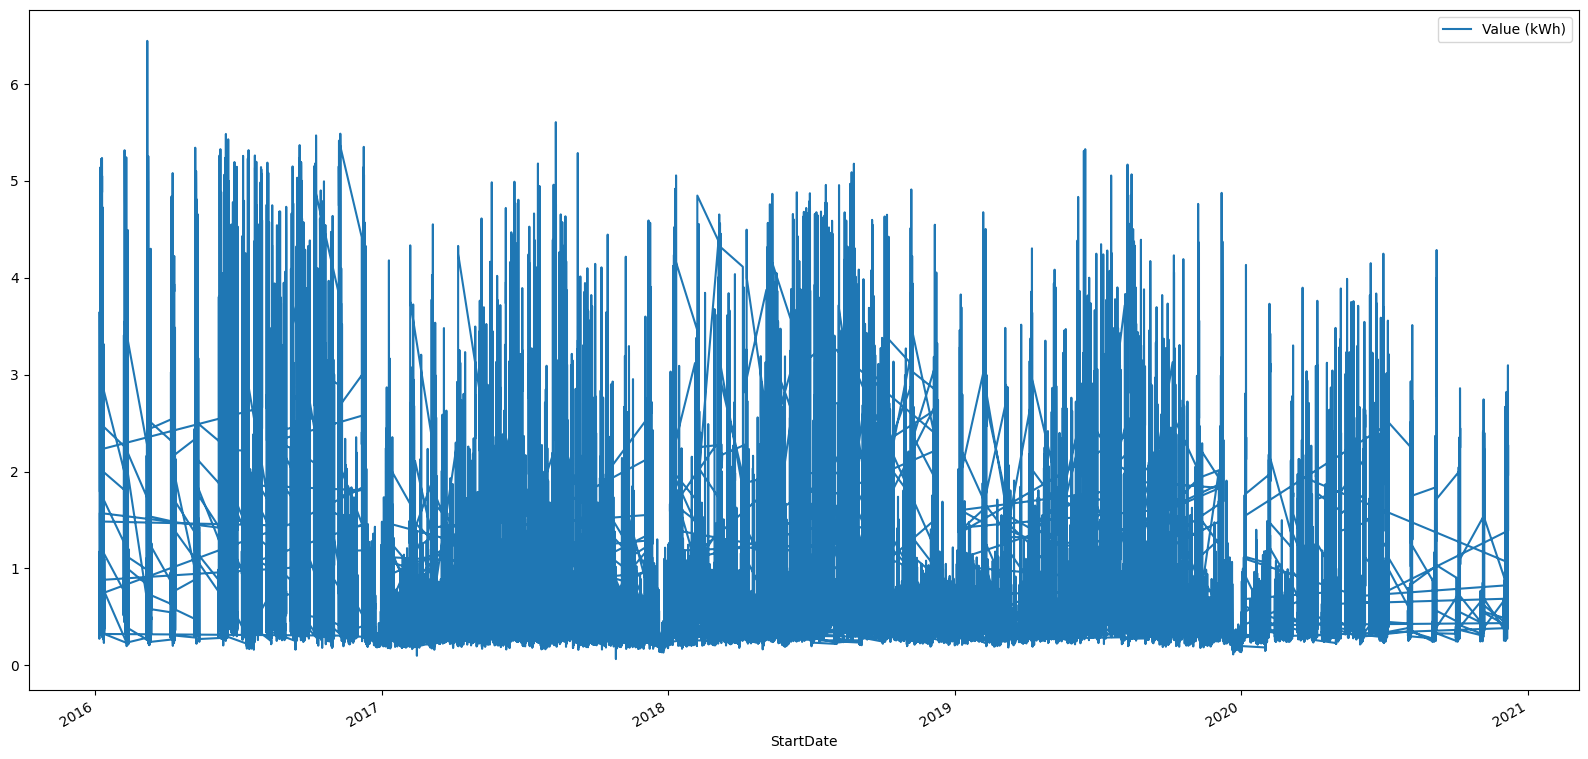

In [15]:
df.plot.line(x='StartDate', y='Value (kWh)', figsize=(20, 10))

### Data appears to have odd anomalies as seen by the drastic line changes. This could indicate corrupted data, missing data, or unordered data

In [16]:
sorteddf = df.sort_values(by='StartDate',ascending=True)

<Axes: xlabel='StartDate'>

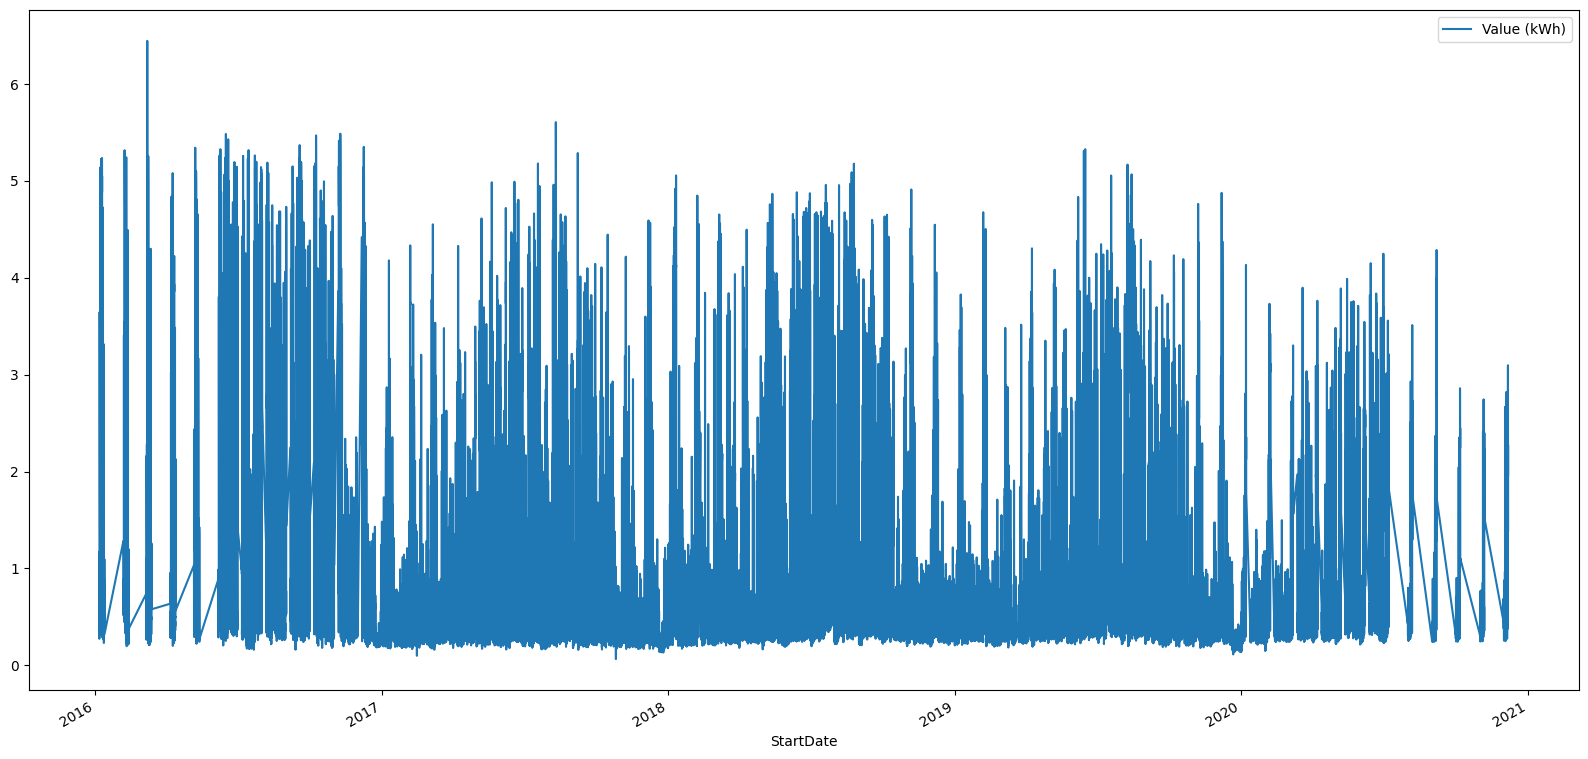

In [17]:
sorteddf.plot.line(x='StartDate', y='Value (kWh)', figsize=(20, 10))

### Basic sorting of the dates appeared to have help, but uncovered odd data in 2016 and 2020. Further review of the 2016 will be done in order to get a better understanding of the data.

In [18]:
sorteddf['year'] = sorteddf['StartDate'].dt.year
sorteddf['month'] = sorteddf['StartDate'].dt.month

<Axes: xlabel='StartDate'>

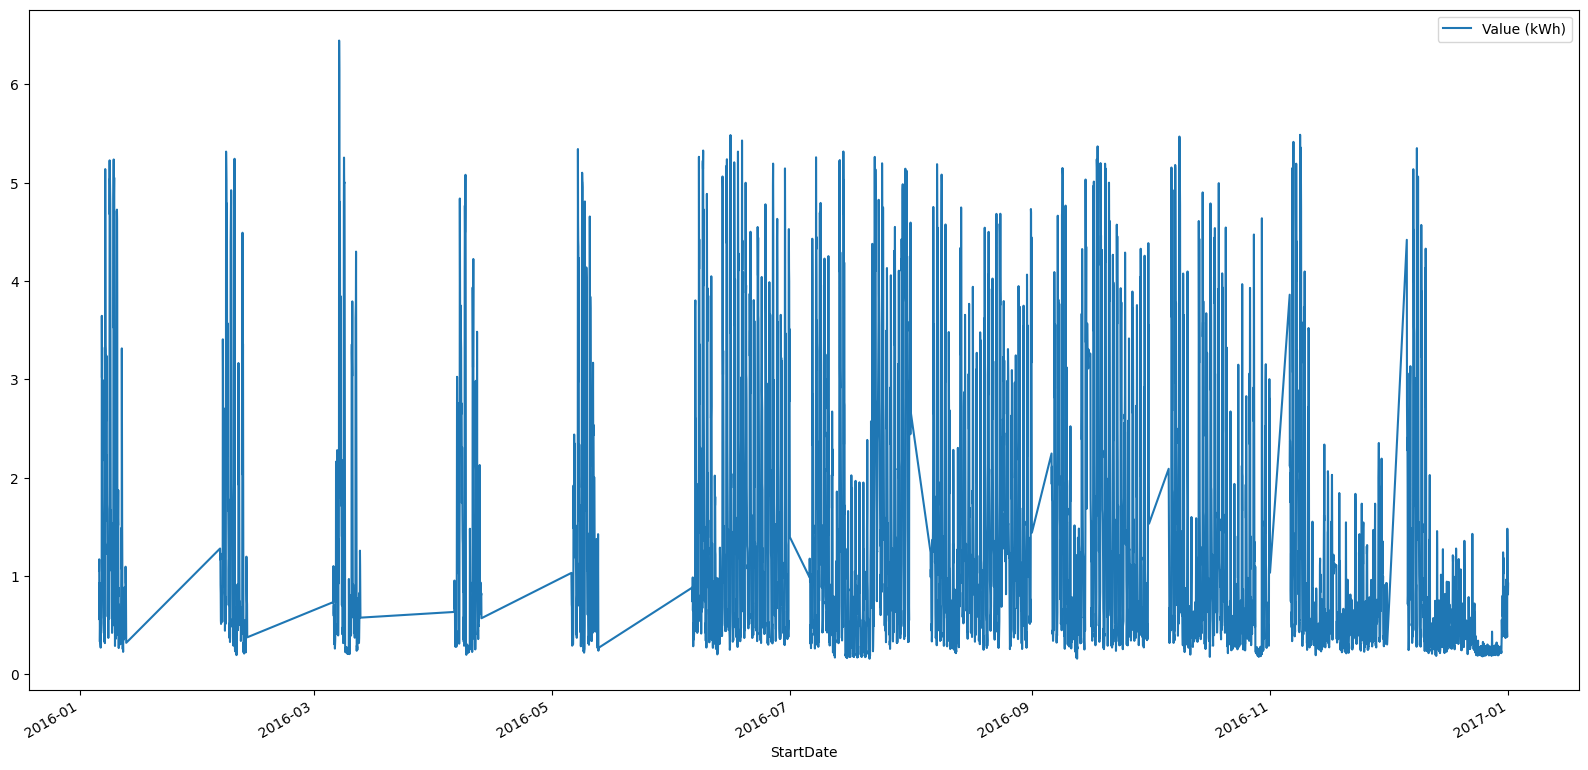

In [19]:
df2016 = sorteddf[sorteddf['year'] == 2016]
df2016.plot.line(x='StartDate', y='Value (kWh)', figsize=(20, 10))

In [20]:
df2016.groupby('month').agg('count')

,StartDate,Value (kWh),day_of_week,notes,year
month,,,,,
1,168,168,168,168,168
2,168,168,168,168,168
3,168,168,168,168,168
4,168,168,168,168,168
5,168,168,168,168,168
6,600,600,600,600,600
7,624,624,624,624,624
8,624,624,624,624,624
9,600,600,600,600,600


<Axes: xlabel='StartDate'>

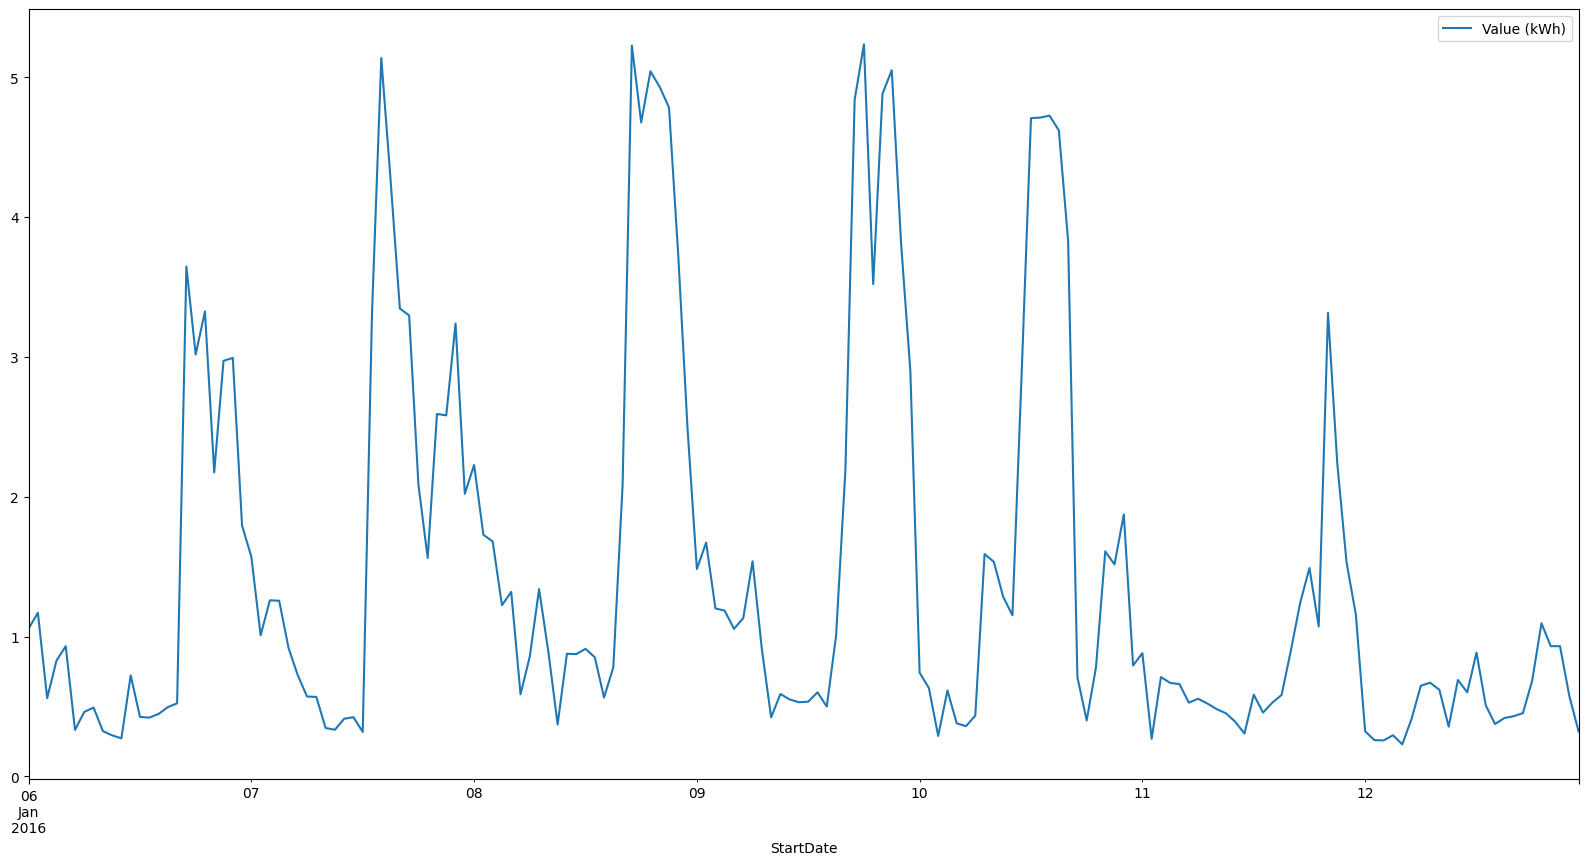

In [21]:
df2016[df2016['month']==1].plot.line(x='StartDate', y='Value (kWh)', figsize=(20, 10))

### 2016 appears to be missing days in the first 6 months and do not have full months for the remainder of the year. This would appear to be the case for end of 2020. A forecast will be generated for 2020 based on 2017 - 2019 and an anamoly detection for 2017 - 2019 will also be created.

## Forecast

In [39]:
df2 = sorteddf[sorteddf['year'].isin([2017, 2018, 2019])]
df2 = df2.sort_values(by='StartDate',ascending=True)

In [40]:
df2.groupby('year').agg('count')

,StartDate,Value (kWh),day_of_week,notes,month
year,,,,,
2017,8760,8760,8760,8760,8760
2018,8760,8760,8760,8760,8760
2019,8760,8760,8760,8760,8760


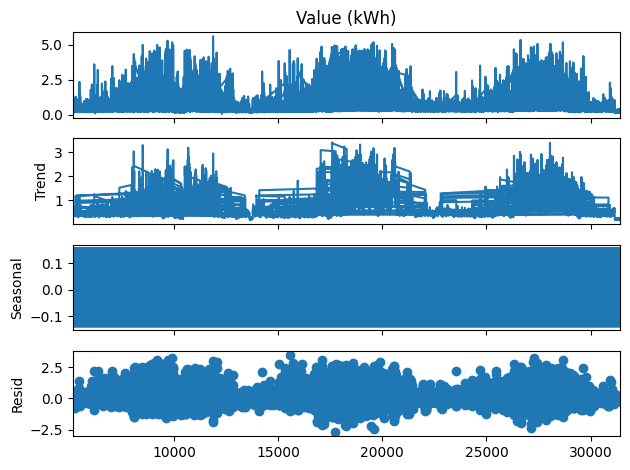

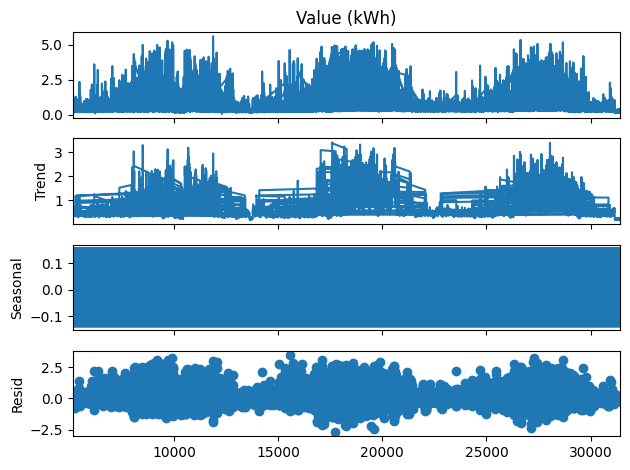

In [41]:
seasonal_decompose(df2['Value (kWh)'], model='additive', period=12).plot()

<Axes: xlabel='Date', ylabel='Value (kWh)'>

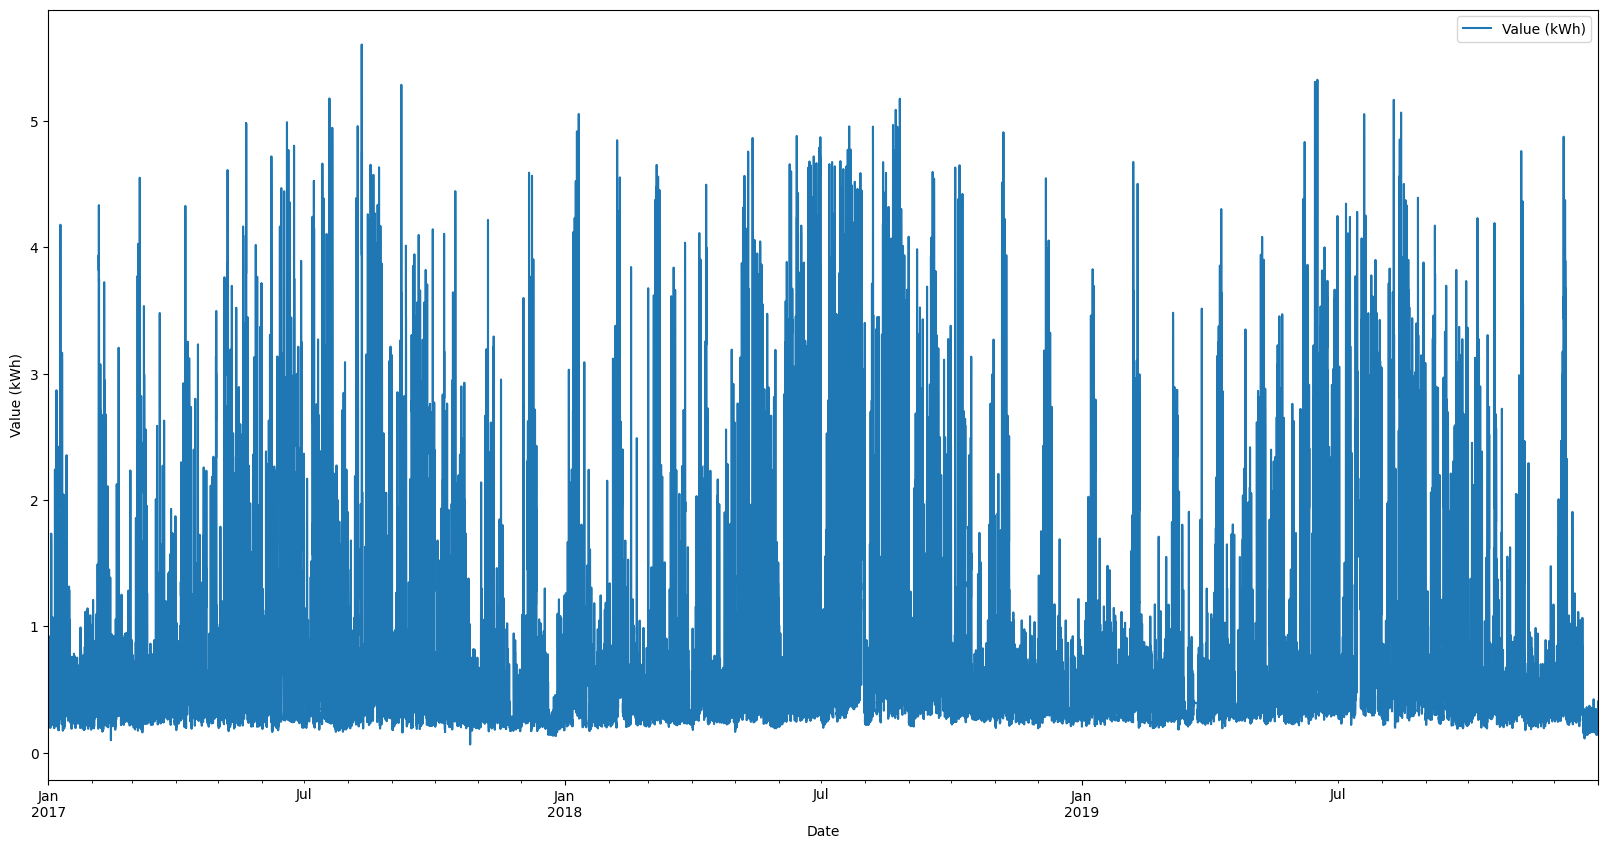

In [42]:
df2.plot.line(x='StartDate', y='Value (kWh)', figsize=(20, 10), xlabel='Date', ylabel='Value (kWh)')

In [45]:
from statsmodels.tsa.stattools import adfuller


In [47]:
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
# Call the function and run the test

adf_test(df2['Value (kWh)'])

Results of Dickey-Fuller Test:
Test Statistic                -1.107772e+01
p-value                        4.389651e-20
#Lags Used                     4.900000e+01
Number of Observations Used    2.623000e+04
Critical Value (1%)           -3.430599e+00
Critical Value (5%)           -2.861650e+00
Critical Value (10%)          -2.566829e+00
dtype: float64
